# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import openweathermapy as ow
from urllib.error import HTTPError

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

setting = {'units':'Imperial','appid':weather_api_key}
retrieve_values = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [7]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [8]:
print('Starting Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*retrieve_values)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Starting Data Retrieval
---------------------
Processing City # 1 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=padang
Processing City # 2 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=mount+isa
Processing City # 3 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=barentsburg
City not found. skipping...
Processing City # 4 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=jamestown
Processing City # 5 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=faanui
Processing City # 6 | demyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=demyansk
Processing City # 7 | ushuaia
http://api.openweathermap.org/data/2

Processing City # 58 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=ilulissat
Processing City # 59 | reporoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=reporoa
Processing City # 60 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=tumannyy
City not found. skipping...
Processing City # 61 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=nikolskoye
Processing City # 62 | durango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=durango
Processing City # 63 | forte dei marmi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=forte+dei+marmi
Processing City # 64 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing City # 115 | san lawrenz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=san+lawrenz
Processing City # 116 | cocachacra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=cocachacra
Processing City # 117 | calvinia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=calvinia
Processing City # 118 | gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=gorontalo
Processing City # 119 | pindiga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=pindiga
Processing City # 120 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=tsihombe
City not found. skipping...
Processing City # 121 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing City # 172 | green valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=green+valley
Processing City # 173 | muskogee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=muskogee
Processing City # 174 | houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=houston
Processing City # 175 | turka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=turka
Processing City # 176 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=martapura
Processing City # 177 | silvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=silvi
Processing City # 178 | vavatenina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7b

Processing City # 227 | malwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=malwan
City not found. skipping...
Processing City # 228 | harlingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=harlingen
Processing City # 229 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=hithadhoo
Processing City # 230 | te karaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=te+karaka
Processing City # 231 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=san+quintin
Processing City # 232 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=marsh+harbour
Processing City # 233 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?

Processing City # 283 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=coquimbo
Processing City # 284 | keighley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=keighley
Processing City # 285 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=saleaula
City not found. skipping...
Processing City # 286 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=upington
Processing City # 287 | binga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=binga
Processing City # 288 | viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=viedma
Processing City # 289 | gonbad-e qabus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b2

Processing City # 339 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=longyearbyen
Processing City # 340 | demba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=demba
Processing City # 341 | ontario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=ontario
Processing City # 342 | macapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=macapa
Processing City # 343 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=vila+velha
Processing City # 344 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=shimoda
Processing City # 345 | ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=

Processing City # 395 | novyy urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=novyy+urengoy
Processing City # 396 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=dunedin
Processing City # 397 | chinchani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=chinchani
Processing City # 398 | kitimat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=kitimat
Processing City # 399 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=roma
Processing City # 400 | isla mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=isla+mujeres
Processing City # 401 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f71

Processing City # 451 | looc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=looc
Processing City # 452 | naifaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=naifaru
Processing City # 453 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=mayo
Processing City # 454 | luwuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=luwuk
Processing City # 455 | barra dos coqueiros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=barra+dos+coqueiros
Processing City # 456 | emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=emba
Processing City # 457 | peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=penic

City not found. skipping...
Processing City # 507 | akola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=akola
Processing City # 508 | hoctun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=hoctun
Processing City # 509 | petropavlovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=petropavlovka
Processing City # 510 | qiongshan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=qiongshan
Processing City # 511 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=sisimiut
Processing City # 512 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=karratha
Processing City # 513 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing City # 563 | tarabuco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=tarabuco
Processing City # 564 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=rungata
City not found. skipping...
Processing City # 565 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=ketchikan
Processing City # 566 | jvari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=jvari
Processing City # 567 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=broken+hill
Processing City # 568 | dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=dzhebariki-khaya
Processing City # 569 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing City # 619 | gilgil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=gilgil
City not found. skipping...
Processing City # 620 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=sao+joao+da+barra
Processing City # 621 | azimur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=azimur
City not found. skipping...
Processing City # 622 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=439b210956f7126180837c4f7a43e7bf&q=natal
---------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dataframe and related csv
weather = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })

# Ouput to csv
weather.to_csv(output_data_file)

In [10]:
# Display dataframe
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,padang,83,ID,1608481781,68,-0.95,100.35,78.15,3.74
1,mount isa,75,AU,1608481781,100,-20.73,139.50,75.20,4.70
2,jamestown,90,US,1608481641,98,42.10,-79.24,35.01,9.17
3,faanui,75,PF,1608481781,70,-16.48,-151.75,80.17,5.61
4,demyansk,99,RU,1608481782,94,57.64,32.47,35.06,6.46


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Check for cities where Humidity > 100
humid_places = weather.loc[(weather['Humidity']>100)]
humid_places

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather['Lat'],weather[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather[y])-20,max(weather[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

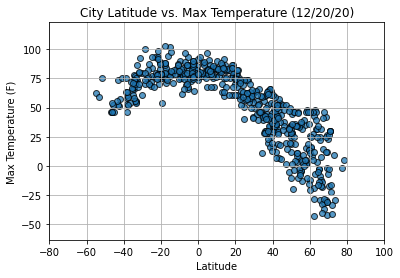

In [15]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

As expected, the plot demonstrates that temperatures fo cities south of the equator are warmer this time of year as compared to cities in the northern hemisphere

## Latitude vs. Humidity Plot

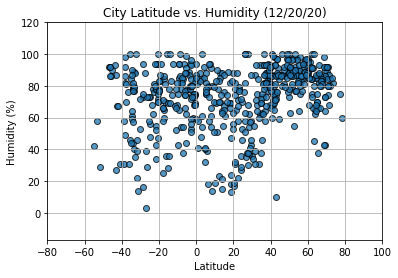

In [16]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity (%)')
lat_humidity

Tighter clustering is observed at higher latitudes.

## Latitude vs. Cloudiness Plot

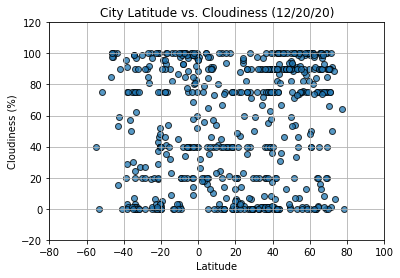

In [17]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness (%)')
lat_cloud

Latitude does not appear to be a signifant factor in relation to Cloudiness % this time of year.

## Latitude vs. Wind Speed Plot

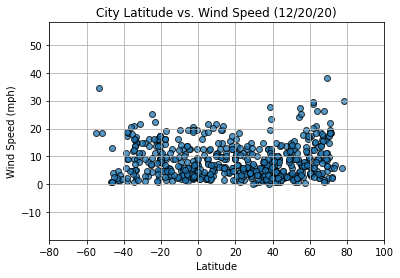

In [18]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

Wind speeds appear more clustered as latitude increases.

## Linear Regression

In [19]:
northern_hem = weather.loc[(weather['Lat']>0)]
northern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
2,jamestown,90,US,1608481641,98,42.10,-79.24,35.01,9.17
4,demyansk,99,RU,1608481782,94,57.64,32.47,35.06,6.46
7,bethel,90,US,1608481782,68,41.37,-73.41,30.99,5.01
12,jesup,75,US,1608481783,87,31.61,-81.89,55.99,4.36
14,aldan,100,RU,1608481783,93,58.60,125.39,2.53,11.25
...,...,...,...,...,...,...,...,...,...
559,sur,3,OM,1608481878,67,22.57,59.53,71.10,10.45
562,chlumec,94,CZ,1608481879,92,50.70,13.94,36.00,14.00
563,bria,13,CF,1608481879,18,6.54,21.99,80.91,3.56
565,kashi,36,CN,1608481879,79,39.45,75.98,19.40,2.24


In [20]:
southern_hem = weather.loc[(weather['Lat']<0)]
southern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,padang,83,ID,1608481781,68,-0.95,100.35,78.15,3.74
1,mount isa,75,AU,1608481781,100,-20.73,139.50,75.20,4.70
3,faanui,75,PF,1608481781,70,-16.48,-151.75,80.17,5.61
5,ushuaia,40,AR,1608481782,42,-54.80,-68.30,62.60,18.34
6,new norfolk,59,AU,1608481782,67,-42.78,147.06,51.01,1.36
...,...,...,...,...,...,...,...,...,...
566,camocim,40,BR,1608481879,51,-2.90,-40.84,89.76,18.90
568,tres arroyos,91,AR,1608481880,49,-38.37,-60.28,63.39,18.70
569,sungaipenuh,100,ID,1608481880,80,-2.08,101.38,64.44,2.93
570,sao joao da barra,20,BR,1608481880,52,-21.64,-41.05,91.40,13.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

The r-squared is: -0.8501864347963429


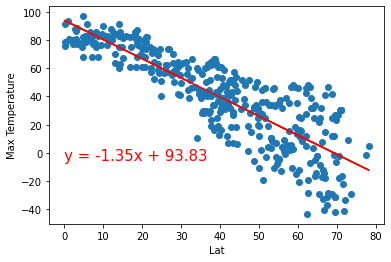

In [22]:
xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (0,-5)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

Strong correlation is observed between Max Temp and Latitude among cities in the northern hemisphere.  Max temps decrease as the distance from the equator increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5683179898781706


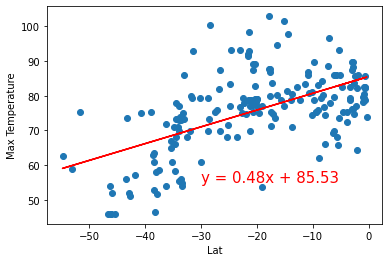

In [23]:
xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (-30,55)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

Less correlation is observed between Max Temp and Latitude among cities in the southern hemisphere.  Max temps decrease as the distance from the equator decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38532892869590324


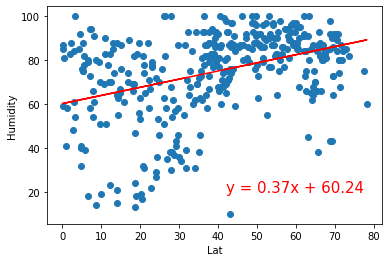

In [24]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (42,20)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

Mild correlation is observed between Humidity and Latitude among cities in the northern hemisphere. Humidity increases as the distance from the equator increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1677399320073926


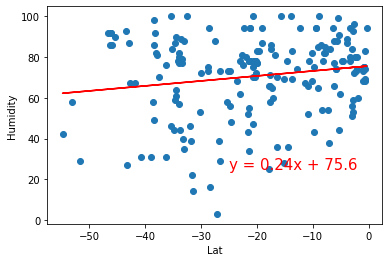

In [25]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-25,25)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

Weak correlation is observed between Humidity and Latitude among cities in the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22592072567155025


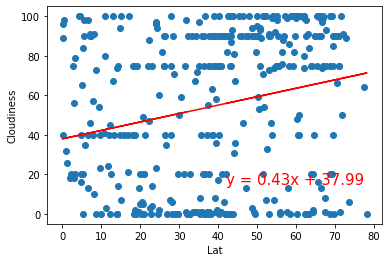

In [26]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (42,15)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

Limited/weak correlation is observed between Cloudiness and Latitude among cities in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15354239852889204


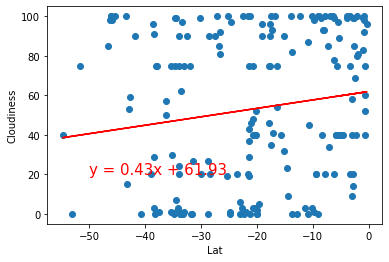

In [27]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-50,20)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

Limited/weak correlation is observed between Cloudiness and Latitude among cities in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15114525528186587


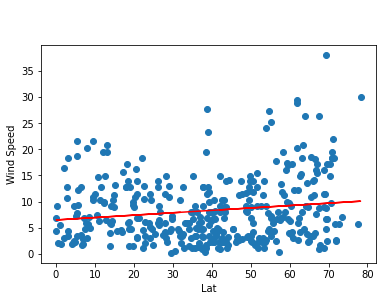

In [28]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (42,45)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

Limited/weak correlation is observed between Wind Speed and Latitude among cities in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1440067465924832


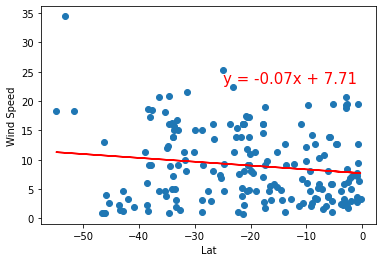

In [29]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,23)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

Slightly more correlation is observed between Wind Speed and Latitude among cities in the southern hemisphere.